<a href="https://colab.research.google.com/github/simon-m-mudd/physical_geography_practicals/blob/main/Physical_geography_flood_practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Physical Geography practical 1: Analysis of flood data (and your first look at python)

Written by Simon M Mudd, last update 23-Jan-2024

## Overview

In this practical we will work with some data that comes from the National River Flow Archive (NFRA) which can be found at: https://nrfa.ceh.ac.uk/

It allows you to perform flood frequency analysis, and then look at the results in plots.

It will also give you a basic overview of python. We will use this again later in the course.

## What is this notebook?

You are reading this practical in something called an ipython notebook. The "i" is for "interactive", the "python" is a programming language.

If you are doing a degree in the School of GeoSciences at the University of Edinburgh, you will take some classes about the python programming language. This is not one of those courses.

In this course I just want you to look at data. In the past we have used spreadsheet programmes for this. But graphs made here look better, and these notebooks are more flexible.

### The only thing you need to know about python programming at this stage

This notebook is organised into "cells".

* Some of the cells just contain text.
* Some contain python code that does something

You don't change the text cells.
For the python cells you just make them run.

To do that you can do one of the following:
Hover over the cell with the code and click on the button that looks like a "play" symbol.

--or--

Click on the cell with the code and type Shift+enter


In [6]:
print("You just ran some python code! You can now put `Data Scientist` into you Linkedin profile!")

You just ran some python code! You can now put `Data Scientist` into you Linkedin profile!


## On to the practial!

### What is the NRFA

You can read the website: https://nrfa.ceh.ac.uk/

But the NRFA contains data from gauging stations distributed around the UK. A gauging station is a place where hydrologists measure flow. Usually they do some very labour intensive measurements of discharge (that is, the volume of water per unit of time, usually reported in m$^3$/s), and then relate this to the "stage" of the river (that is, the elevation of the water surface).

The relationship between the stage and the discharge is called a **rating curve**. Hydrolgists make rating curves because stage is much easier to measure than discharge.

You can find out the data about the gauging stations in the NRFA catalogue. But for now all you need to know is each station has a **station ID**, which is just a number.

For example, station 8010 is the River Spey at Grantown

### Get some data from the NFRA!

Now lets get some data from the National River Flow archive (NRFA).

We use a little python tool for this (you need to be connected to the internet).

Before we get some flow records we need to get some information about the stations:

In [7]:
!pip install nrfapy &> /dev/null

Now lets get some data. We are going to get the annual maximum flow. This is the peak discharge at the station for that water year (which runs from XXXX to XXXX).

In [88]:
import nrfapy

station = 8010
data_type = "amax-flow"
amax_flow_df = nrfapy.get_ts(station,data_type)
amax_flow_df.head()

,time,amax-flow
0,1952-01-15T00:00:00,123.539
1,1953-09-02T00:00:00,165.870
2,1953-12-03T00:00:00,205.130
3,1954-12-04T00:00:00,296.139
4,1956-08-14T00:00:00,296.139


In [91]:
# Convert 'datetime' column to datetime format
amax_flow_df['datetime'] = pd.to_datetime(amax_flow_df['time'], format='%Y-%m-%dT%H:%M:%S')


# Extract the year from the datetime column
amax_flow_df['year'] = amax_flow_df['datetime'].dt.year

amax_flow_df.head()

,time,amax-flow,datetime,year
0,1952-01-15T00:00:00,123.539,1952-01-15,1952
1,1953-09-02T00:00:00,165.870,1953-09-02,1953
2,1953-12-03T00:00:00,205.130,1953-12-03,1953
3,1954-12-04T00:00:00,296.139,1954-12-04,1954
4,1956-08-14T00:00:00,296.139,1956-08-14,1956


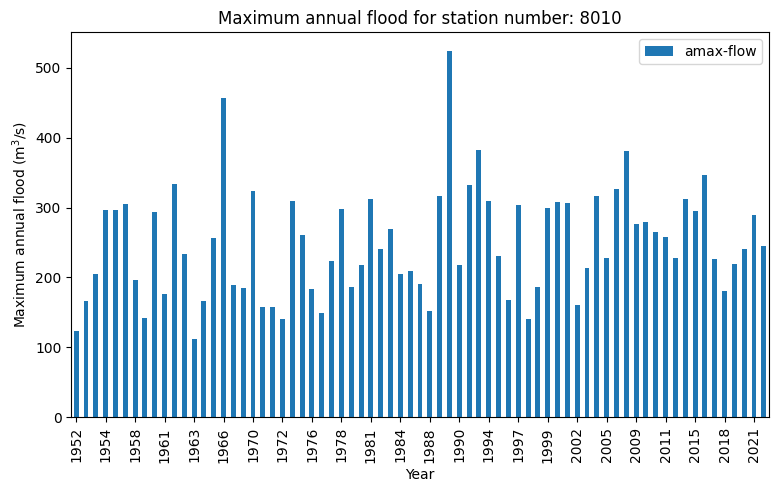

In [103]:
ax = amax_flow_df.plot.bar(x='year', y='amax-flow', rot=90, figsize=(9, 5))

# Set x-axis label to be the year
plt.xlabel('Year')

# Set y-axis label
plt.ylabel('Maximum annual flood (m$^3$/s)')

# Set the title
plt.title('Maximum annual flood for station number: '+str(station))

# Show every 3rd label on the x-axis
plt.xticks(amax_flow_df["amax-flow"].index[::3]);

## Now for flood frequency

We are going to look at the flood frequency.

## Getting information about the stations

So we have looked at a single station (station number 8010, the River Spey at Grantown). You might want to search for stations on your favourite river. For this we need to look at the NRFA catalogue.

We can get this with a line of python: `stations_data = nrfapy.catalogue()`

After that we use `pandas` to search the data. The `head()` command below shows you the first few lines of the data and what the column names are.

In [9]:
import nrfapy
stations_data = nrfapy.catalogue()
stations_data.head()

,id,name,catchment-area,grid-reference,easting,northing,lat-long,latitude,longitude,river,...,peak-flow-rejected-amax-years,peak-flow-rejected-periods,data-summary,licence-url,description-summary,description-general,description-station-hydrometry,description-flow-record,description-catchment,description-flow-regime
0,1001,Wick at Tarroul,161.9,"{'ngr': 'ND2620254915', 'easting': 326202.0, '...",326202.0,954915.0,"{'string': '58°28'34.3048""N 3°16'01.4180""W', '...",58.47620,-3.26706,Wick,...,None,None,"{'data-types': [{'data-type': 'gdf', 'paramete...",http://eidc.ceh.ac.uk/administration-folder/to...,Velocity area station gauging a catchment in t...,Velocity area station in relatively straight (...,Cableway present. Rarely by-passed; MAF probab...,None,Relatively dry and flat catchment given over l...,Natural flow regime.
1,2001,Helmsdale at Kilphedir,551.4,"{'ngr': 'NC9983918163', 'easting': 299839.0, '...",299839.0,918163.0,"{'string': '58°08'27.6037""N 3°42'10.6144""W', '...",58.14100,-3.70295,Helmsdale,...,{'excluded-years': [1974]},None,"{'data-types': [{'data-type': 'gdf', 'paramete...",http://eidc.ceh.ac.uk/administration-folder/to...,Velocity area station in upland Scotland. Flow...,Velocity area station; approx. 35m wide river ...,Stable gravel control. Two peak flow rating ac...,Full period of record peak flow data reviewed ...,Typical Scottish upland impermeable bedrock he...,Loch Badanloch and an-Ruathair used for river ...
2,2002,Brora at Bruachrobie,434.4,"{'ngr': 'NC8915603916', 'easting': 289156.0, '...",289156.0,903916.0,"{'string': '58°00'38.0048""N 3°52'39.2357""W', '...",58.01056,-3.87757,Brora,...,{'excluded-years': [1992]},None,"{'data-types': [{'data-type': 'gdf', 'paramete...",http://eidc.ceh.ac.uk/administration-folder/to...,Velocity area station in upland Scotland. Main...,Velocity area station about 40m wide with rela...,Ratings derived from current meter gaugings up...,Full period of record peak flow data reviewed ...,"Mountainous headwaters, often snowy in winter....",Mainly natural regime. Small headwater diversi...
3,3001,Shin at Lairg,494.6,"{'ngr': 'NC581062', 'easting': 258100.0, 'nort...",258100.0,906200.0,"{'string': '58°01'19.9838""N 4°24'14.5766""W', '...",58.02222,-4.40405,Shin,...,None,None,"{'data-types': [{'data-type': 'gdf', 'paramete...",http://eidc.ceh.ac.uk/administration-folder/to...,Station measuring flows between Loch Shin and ...,River section between main Loch Shin (HEP) dam...,None,1953-56 data pre-dates the start of impoundmen...,None,None
4,3002,Carron at Sgodachail,241.1,"{'ngr': 'NH4913692152', 'easting': 249136.0, '...",249136.0,892152.0,"{'string': '57°53'35.5581""N 4°32'48.0657""W', '...",57.89321,-4.54668,Carron,...,{'excluded-years': [1973]},None,"{'data-types': [{'data-type': 'gdf', 'paramete...",http://eidc.ceh.ac.uk/administration-folder/to...,Velocity area station. Low and medium flows af...,Velocity area station; river section about 35m...,Gravel bed with problems of stability in low f...,Full period of record peak flow data reviewed ...,Approx. 80% of this remote Highland catchment ...,Computed low flows are natural in relation to ...


You can search for an individual station by using the line below.

Try to change the number from 8010.

If you use a number that does not correspond to a station you will get an empty row.

**Do not change anything else in the code cell!**

In [22]:
stations_data.loc[stations_data['id'] == 8010]

,id,name,catchment-area,grid-reference,easting,northing,lat-long,latitude,longitude,river,...,peak-flow-rejected-amax-years,peak-flow-rejected-periods,data-summary,licence-url,description-summary,description-general,description-station-hydrometry,description-flow-record,description-catchment,description-flow-regime
53,8010,Spey at Grantown,1748.8,"{'ngr': 'NJ0328226785', 'easting': 303282.0, '...",303282.0,826785.0,"{'string': '57°19'16.7743""N 3°36'27.6230""W', '...",57.32133,-3.60767,Spey,...,{'excluded-years': [1951]},None,"{'data-types': [{'data-type': 'gdf', 'paramete...",http://eidc.ceh.ac.uk/administration-folder/to...,Velocity area station. Part of the catchment i...,Velocity area station about 60m wide.,Cableway rated with natural control. Improved ...,Full period of record peak flow data reviewed ...,"Upland catchment, often snowy in winter. Grani...",Loch Insh and Insh Marshes: at high flows floo...


You can then use the below query to get all the stations on your favourite river.

Try changing the name of the river!

In [15]:
stations_data[stations_data['river'].str.contains("Spey")]

,id,name,catchment-area,grid-reference,easting,northing,lat-long,latitude,longitude,river,...,peak-flow-rejected-amax-years,peak-flow-rejected-periods,data-summary,licence-url,description-summary,description-general,description-station-hydrometry,description-flow-record,description-catchment,description-flow-regime
44,8001,Spey at Aberlour,2654.7,"{'ngr': 'NJ2778543972', 'easting': 327785.0, '...",327785.0,843972.0,"{'string': '57°28'48.7849""N 3°12'21.5105""W', '...",57.48022,-3.20598,Spey,...,None,None,"{'data-types': [{'data-type': 'gdf', 'paramete...",http://eidc.ceh.ac.uk/administration-folder/to...,Velocity area station in largely mountainous c...,Velocity area station about 45 m wide. Removed...,Natural control. Bank collapse in 1995 blocked...,Daily flows not archived since 1974.,Catchment is largely mountainous (includes all...,15% of catchment controlled for HEP production...
45,8002,Spey at Kinrara,1011.7,"{'ngr': 'NH8809908201', 'easting': 288099.0, '...",288099.0,808201.0,"{'string': '57°09'03.6087""N 3°51'04.5609""W', '...",57.15100,-3.85127,Spey,...,None,None,"{'data-types': [{'data-type': 'gdf', 'paramete...",http://eidc.ceh.ac.uk/administration-folder/to...,Velocity area station with headwaters in the C...,Velocity area station about 50m wide. Station ...,Natural control. Cableway rated to bankfull. W...,Flow of 232 cumecs gauged in both 1962 and 200...,"Mountainous headwaters, often snowy in winter....",380 sq km developed for hydro-power with diver...
46,8003,Spey at Ruthven Bridge,533.8,"{'ngr': 'NN759996', 'easting': 275900.0, 'nort...",275900.0,799600.0,"{'string': '57°04'14.3486""N 4°02'54.5970""W', '...",57.07065,-4.04850,Spey,...,None,None,"{'data-types': [{'data-type': 'gdf', 'paramete...",http://eidc.ceh.ac.uk/administration-folder/to...,Velocity area station with some of the catchme...,Velocity area station with some of the catchme...,None,None,None,287 sq km controlled for HEP production; major...
48,8005,Spey at Boat of Garten,1267.8,"{'ngr': 'NH9469119208', 'easting': 294691.0, '...",294691.0,819208.0,"{'string': '57°15'05.0103""N 3°44'49.3034""W', '...",57.25139,-3.74703,Spey,...,None,None,"{'data-types': [{'data-type': 'gdf', 'paramete...",http://eidc.ceh.ac.uk/administration-folder/to...,Velocity area station with some of the catchme...,Velocity area station. Station re-located d/s ...,Cableway rated. Natural control and relatively...,Full period of record peak flow data reviewed ...,Upland catchment with mountainous headwaters o...,Loch Insh and Insh marshes may influence flood...
49,8006,Spey at Boat o Brig,2861.2,"{'ngr': 'NJ3185051788', 'easting': 331850.0, '...",331850.0,851788.0,"{'string': '57°33'03.7481""N 3°08'25.3970""W', '...",57.55104,-3.14039,Spey,...,{'excluded-years': [1951]},None,"{'data-types': [{'data-type': 'gdf', 'paramete...",http://eidc.ceh.ac.uk/administration-folder/to...,"Velocity area station, the most downstream sta...",Velocity area station 65m wide. Cableway rated...,Natural control. Floods above 2.5m bypass stat...,Full period of record peak flow data reviewed ...,Mountainous catchment (includes all north slop...,Storage at Loch Insh and Insh marshes - at hig...
50,8007,Spey at Invertruim,400.4,"{'ngr': 'NN6876196425', 'easting': 268761.0, '...",268761.0,796425.0,"{'string': '57°02'24.6183""N 4°09'52.1814""W', '...",57.04017,-4.16449,Spey,...,"{'excluded-years': [1994, 1995, 1996, 1997]}",{'rejected-periods': ['1995-01-01/1998-10-01']},"{'data-types': [{'data-type': 'gdf', 'paramete...",http://eidc.ceh.ac.uk/administration-folder/to...,Velocity area station. The highest station on ...,"Velocity area station, 45m wide Cableway rated...",Natural control; frequent rating changes. Bypa...,Unrepresentative period from 01/01/95 to 28/10...,"Mountainous headwaters, often snowy in winter....",200.4 sq.km controlled for HEP by British Alum...
53,8010,Spey at Grantown,1748.8,"{'ngr': 'NJ0328226785', 'easting': 303282.0, '...",303282.0,826785.0,"{'string': '57°19'16.7743""N 

### Plot station locations

We might want to see where these stations are.

We can plot them on a map, but first we need to install something called contextily, which is a nice package for showing basemaps. You don't need to worry about that at this point.

In [29]:
!pip install contextily &> /dev/null

In [78]:
import geopandas as gpd
import contextily as ctx

# Make a dataframe with just the stations on the Spey.
my_stations = stations_data[stations_data['river'].str.contains("Spey")]

# Now we use the British National Grid coordinates
# Every coordinate reference system (crs) has a code. The british national grid's code is EPSG:27700
gdf2 = gpd.GeoDataFrame(my_stations, geometry=gpd.points_from_xy(my_stations.easting, my_stations.northing), crs='EPSG:27700')

# You could also do this with latitude and longitude, but it results in a slightly distorted map
#gdf = gpd.GeoDataFrame(my_stations, geometry=gpd.points_from_xy(my_stations.longitude, my_stations.latitude), crs='EPSG:4326')


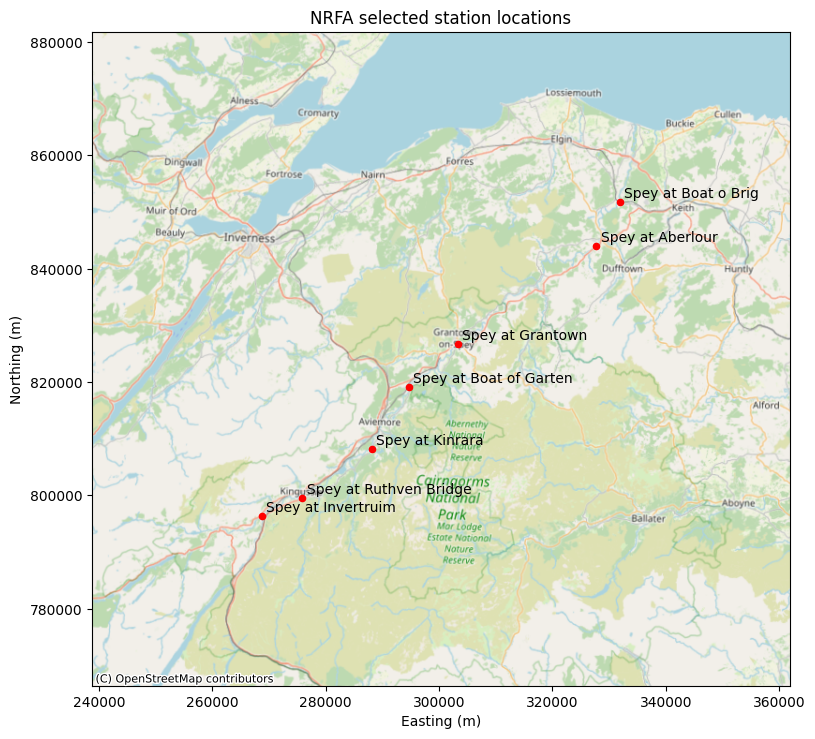

In [83]:
# Create a plot using geopands
ax = gdf2.plot(marker='o', color='red', markersize=20, figsize=(9, 9))


# This labels the stations
for x, y, label in zip(gdf2.geometry.x, gdf2.geometry.y, gdf2.name):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

# The plot looks better if you pad the points by 30km
# The next three lines to that. If you want to change the padding only change
# the "padding" number
padding = 30000
xlim = (gdf2.total_bounds[0] - padding, gdf2.total_bounds[2] + padding)
ylim = (gdf2.total_bounds[1] - padding, gdf2.total_bounds[3] + padding)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

# Now add a basemap
ctx.add_basemap(ax,source=ctx.providers.OpenStreetMap.Mapnik,crs=gdf2.crs.to_string())

# Set axis labels and title
ax.set_xlabel('Easting (m)')
ax.set_ylabel('Northing (m)')
ax.set_title('NRFA selected station locations')

# Show the plot
plt.show()

If you want to play with this try doing all the above but just change the river name.